# Introduction

Google has introduced Universal Sentence Encoder which has been a very useful tool in the NLP domain. The main advantages of this embedding is that it is able to understand context, is trained on vast amount of data, and produces same shape vector for words, sentences and paragraphs thus making it easy to compare the vector space to find similiar embeddings in the vector space.

The Universal Sentence Encoder encodes text into high-dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks. The universal-sentence-encoder model is trained with a deep averaging network (DAN) encoder.

# Semantic Similarity

<img src="A.png"/>

Semantic similarity is a measure of the degree to which two pieces of text carry the same meaning. This is broadly useful in obtaining good coverage over the numerous ways that a thought can be expressed using language without needing to manually enumerate them.

# Data Description & Approach

The data contains a pair of sentence. These text sentences are randomly sampled from a raw dataset. Each pair of the sentence may or may not be semantically similar.
1: Highly similar
0: Highly dissimilar

Approach
The Text embedding converts text (sentences in our case) into numerical vectors.

After converting the sentences into vectors we can calculate how close these vectors are based on euclidean distance/ cosine similarity or any other method. and that itself can tell how similar our sentences are. In our case, we have used cosine similarity.

we have used Universal Sentence Encoder(USE). It encodes text into higher dimensional vectors that can be used for our semantic similarity task. The pre-trained Universal Sentence Encoder(USE) is publicly available in tensorflow hub.

# Importing required libraries:

In [1]:
import tensorflow as tf       # To work with USE4
import pandas as pd           # To work with tables 
import tensorflow_hub as hub  # contains USE4
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #Model is imported from this URL ,Load pre-trained universal sentence encoder model
model = hub.load(module_url)
embed = hub.KerasLayer(module_url)
def embed(input):
  return model(input)
from numpy import dot     # to calculate the dot product of two vectors
from numpy.linalg import norm  #for finding the norm of a vector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
nltk.download('stopwords')
import re
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pjpun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pjpun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pjpun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Text pre-processing

In [2]:
#set of stop words to be removed while text pre-processing
stop_words = set(stopwords.words('english'))

In [3]:
def decontracted(phrase):
    
    ''' method to de-contract the common phrases '''
    
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def striphtml(data): 
    ''' method to remove html tags from the text'''
    cleanr = re.compile('<.*?>') 
    cleantext = re.sub(cleanr, ' ', str(data)) 
    return cleantext


def stripunc(data):
    ''' method to remove punctuations and numbers'''
    return re.sub('[^A-Za-z]+', ' ', str(data), flags=re.MULTILINE|re.DOTALL)


def compute(sent): 
    '''Phrases in sentences are de-contracted, html tags and punctuations are removed and
    finally words are brought back to their base form through lemmatization'''
    
    lemmatizer = WordNetLemmatizer()
    
    sent = decontracted(sent)   #decontracts the phrase
    sent = striphtml(sent)      #strips html from the sentence
    sent = stripunc(sent)       #removes the puncutations
    words=word_tokenize(str(sent.lower())) #turns sentences in to lower case and then tokenizer it 
    words = [lemmatizer.lemmatize(word) for word in words] #lemmatization ie, changing words to their base form
    words = [word for word in words if word not in stop_words] #removing stopwords
    sent1 = ' '.join(words)
    
    return sent1

In [4]:
df = pd.read_csv("Text_Similarity_Dataset.csv")

In [5]:
df.head()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...


In [6]:
#apply text-preprocessing ie., removing stop words, stiping punctuations and html code and lemmatization
df['text1'] = df['text1'].apply(lambda x: compute(x)) 
df['text2'] = df['text2'].apply(lambda x: compute(x))

In [7]:
df.head()

,Unique_ID,text1,text2
0,0,savvy searcher fail spot ad internet search en...,newcastle bolton kieron dyer smashed home winn...
1,1,million miss net uk population still without i...,nasdaq planning share sale owner technology do...
2,2,young debut cut short ginepri fifteen year old...,ruddock back yapp credential wale coach mike r...
3,3,diageo buy u wine firm diageo world biggest sp...,mci share climb takeover bid share u phone com...
4,4,careful code new european directive could put ...,medium gadget get moving pocket sized device l...


In [8]:
df.shape

(4023, 3)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['text1'][0]

'savvy searcher fail spot ad internet search engine user odd mix naive sophisticated suggests report search habit report u pew research center reveals searcher usually find looking using search engine also show spot difference paid result organic one report reveals net user say regularly use google ask jeeves msn yahoo online almost questioned said would trust search engine much le knew information paid result wa hidden according figure gathered pew researcher average user spends minute per month carrying separate search look webpage hunt significant chunk net user carry search least weekly asked look every week questioned information looking critical information simply find search engine user also tend loyal found site feel trust tend stick according pew research searcher use single search engine use two three small number consult three site tony macklin spokesman ask jeeves said result reflected research showed people use different search engine way site gather information mean provi

In [11]:
type(df['text1'][0])

str

# Encoding text to vectors:

We have used USE version 4. It is trained on the whole wikipedia data. Our Sentence have a sequence of words. we give this sentence to our model (USE4), it gives us a "dense numeric vector". Here, we passed sentence pair and got a vector pair.

In [12]:
message = [df['text1'][0], df['text2'][0]]
message_embeddings = embed(message)
message_embeddings

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[ 0.04846955, -0.05492515, -0.03979637, ...,  0.04986379,
        -0.05659702, -0.04724964],
       [-0.04010551, -0.04867917, -0.04867957, ..., -0.04709514,
        -0.04867961, -0.048492  ]], dtype=float32)>

In [13]:
type(message_embeddings)

tensorflow.python.framework.ops.EagerTensor

Here we can see that the type of the vector retured is tensorflow.python.framework.ops.EagerTensor so, we cannot directly use it to compute the cosine similarity. We need to convert it into a numpy array first.

In [14]:
type(tf.make_ndarray(tf.make_tensor_proto(message_embeddings)))

numpy.ndarray

In [15]:
a_np = tf.make_ndarray(tf.make_tensor_proto(message_embeddings))

# Finding Cosine similarity

we ran a for loop for all the sentence pair present in our data and found the vector representation of our sentences. For each vector pair, we found the cosine between the by using usual cosine formula. i.e.

cosin = dot(a,b)/norm(a)*norm(b)
we get the value ranging from -1 to 1. But, we need values ranging from 0 to 1 hence we will add 1 to the cosine similarity value and then normalizze it.

In [16]:
ans = [] # This list will contain the cosin similarity value for each vector pair present.
for i in range(len(df)):
  messages = [df['text1'][i], df['text2'][i]] #storing each sentence pair in messages
  message_embeddings = embed(messages) #converting the sentence pair to vector pair using the embed() function
  a = tf.make_ndarray(tf.make_tensor_proto(message_embeddings)) #storing the vector in the form of numpy array
  cos_sin = dot(a[0], a[1])/(norm(a[0])*norm(a[1])) #Finding the cosine between the two vectors
  ans.append(cos_sin)  

In [17]:
len(ans)

4023

In [18]:
Ans = pd.DataFrame(ans, columns = ['Similarity_Score'])  #converting the ans list into Dataframe so that we can add it to our "Data"

In [19]:
Ans.head()

,Similarity_Score
0,0.140407
1,0.299244
2,0.585974
3,0.327378
4,0.436518


In [20]:
Data = df.join(Ans)  #Joining the Similarity_Score Dataframe (Ans) to our main Data

In [21]:
Data['Similarity_Score'] = Data['Similarity_Score'] + 1 #adding 1 to each of the values of Similarity_Score to make the values from 0 to 2. (Initially it was from [-1,1])

In [22]:
Data.head(2)

,Unique_ID,text1,text2,Similarity_Score
0,0,savvy searcher fail spot ad internet search en...,newcastle bolton kieron dyer smashed home winn...,1.140407
1,1,million miss net uk population still without i...,nasdaq planning share sale owner technology do...,1.299244


In [23]:
Data['Similarity_Score'] = Data['Similarity_Score']/Data['Similarity_Score'].abs().max() #Normalizing the Similarity_Score to get the value between 0 and 1

In [24]:
Data.head(10)

,Unique_ID,text1,text2,Similarity_Score
0,0,savvy searcher fail spot ad internet search en...,newcastle bolton kieron dyer smashed home winn...,0.570204
1,1,million miss net uk population still without i...,nasdaq planning share sale owner technology do...,0.649622
2,2,young debut cut short ginepri fifteen year old...,ruddock back yapp credential wale coach mike r...,0.792987
3,3,diageo buy u wine firm diageo world biggest sp...,mci share climb takeover bid share u phone com...,0.663689
4,4,careful code new european directive could put ...,medium gadget get moving pocket sized device l...,0.718259
5,5,india seek boost construction india ha cleared...,music mogul fuller sell company pop idol supre...,0.652338
6,6,podcasters look net money nasa year old boy be...,ukip outspent labour eu poll uk independence p...,0.572485
7,7,row police power csos police federation ha sai...,ban hunting come force fox hunting dog illegal...,0.702409
8,8,election could terror target terrorist might t...,nh waiting time target cut hospital waiting ti...,0.659050
9,9,japan economy slide recession japanese economy...,optimism remains uk housing uk property market...,0.696236


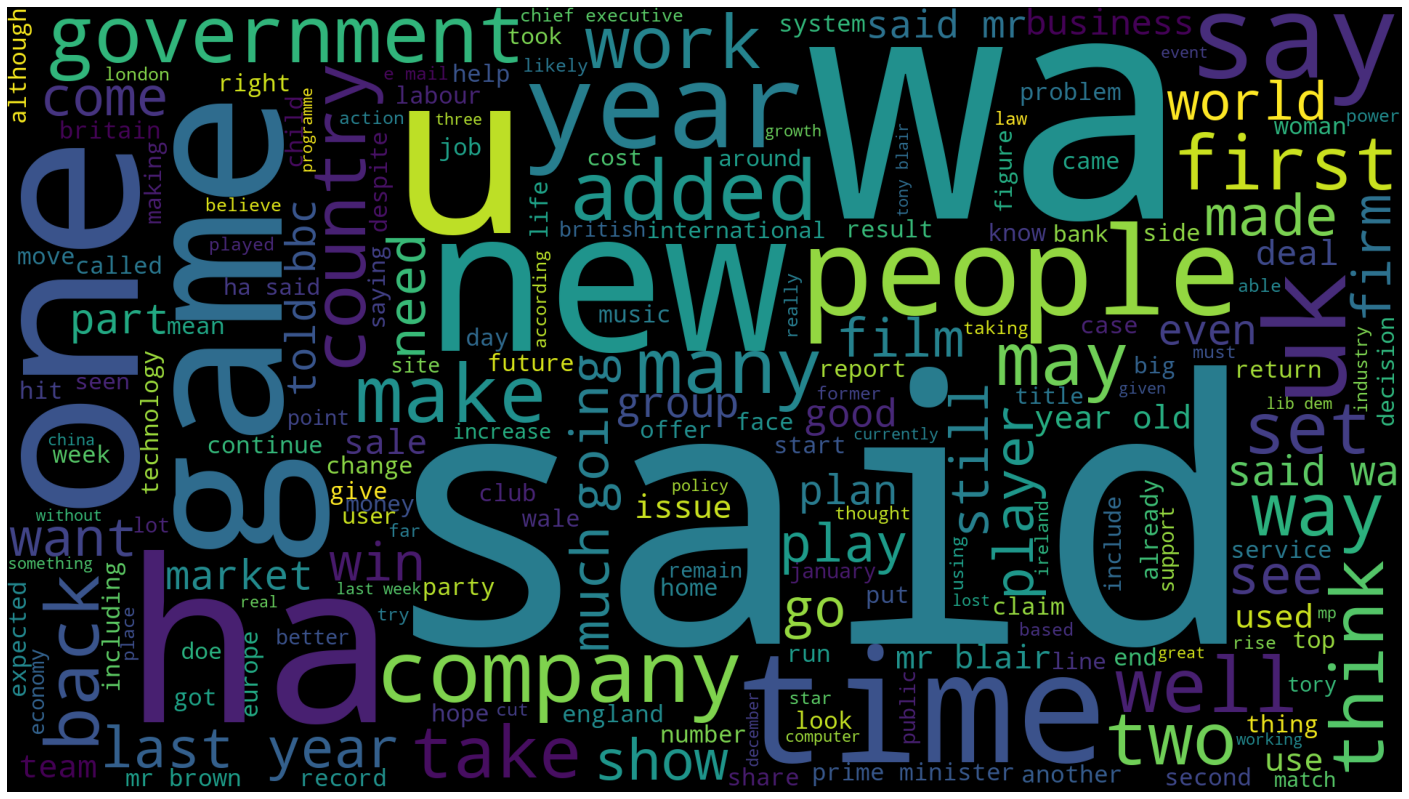

In [25]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(df.text1))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

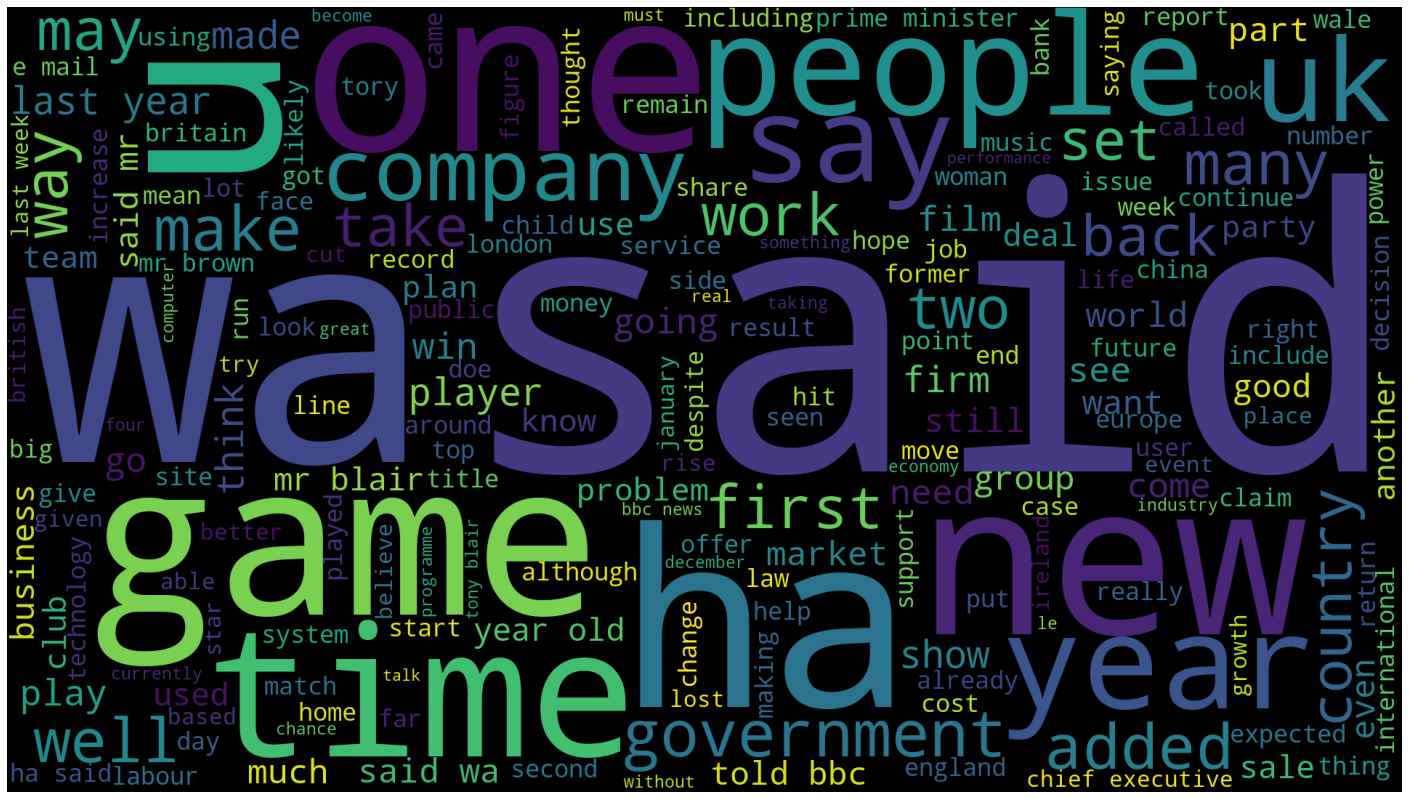

In [26]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(df.text2))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Similarity")

In [28]:
def plot(messages_):
    message_embeddings_ = embed(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

In [29]:
def SimilarityScore(messages):
    message_embedding = embed(messages)
    corr = np.inner(message_embedding,message_embedding)
    print(corr)

In [30]:
SentMessage = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
    "How are u?"
]

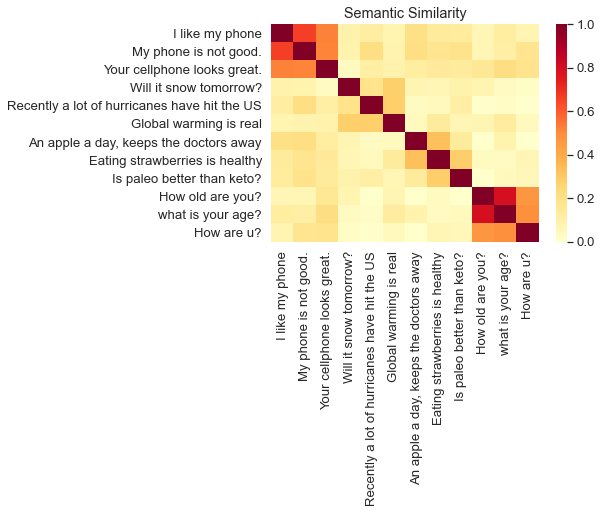

In [31]:
plot(SentMessage)

In [32]:
word ='Text analysis'
Sentence = 'what is Text analysis'
Para =("Text Analysis is about parsing texts in order to extract machine-readable facts from them. The purpose of Text Analysis is to create structured data out of free text content. The process can be thought of as slicing and dicing heaps of unstructured, heterogeneous documents into easy-to-manage and interpret data pieces.")
case4Message=[word,Sentence,Para]

In [33]:
SimilarityScore(case4Message)

[[1.0000001  0.6787443  0.49651012]
 [0.6787443  1.0000001  0.55869675]
 [0.49651012 0.55869675 0.99999994]]


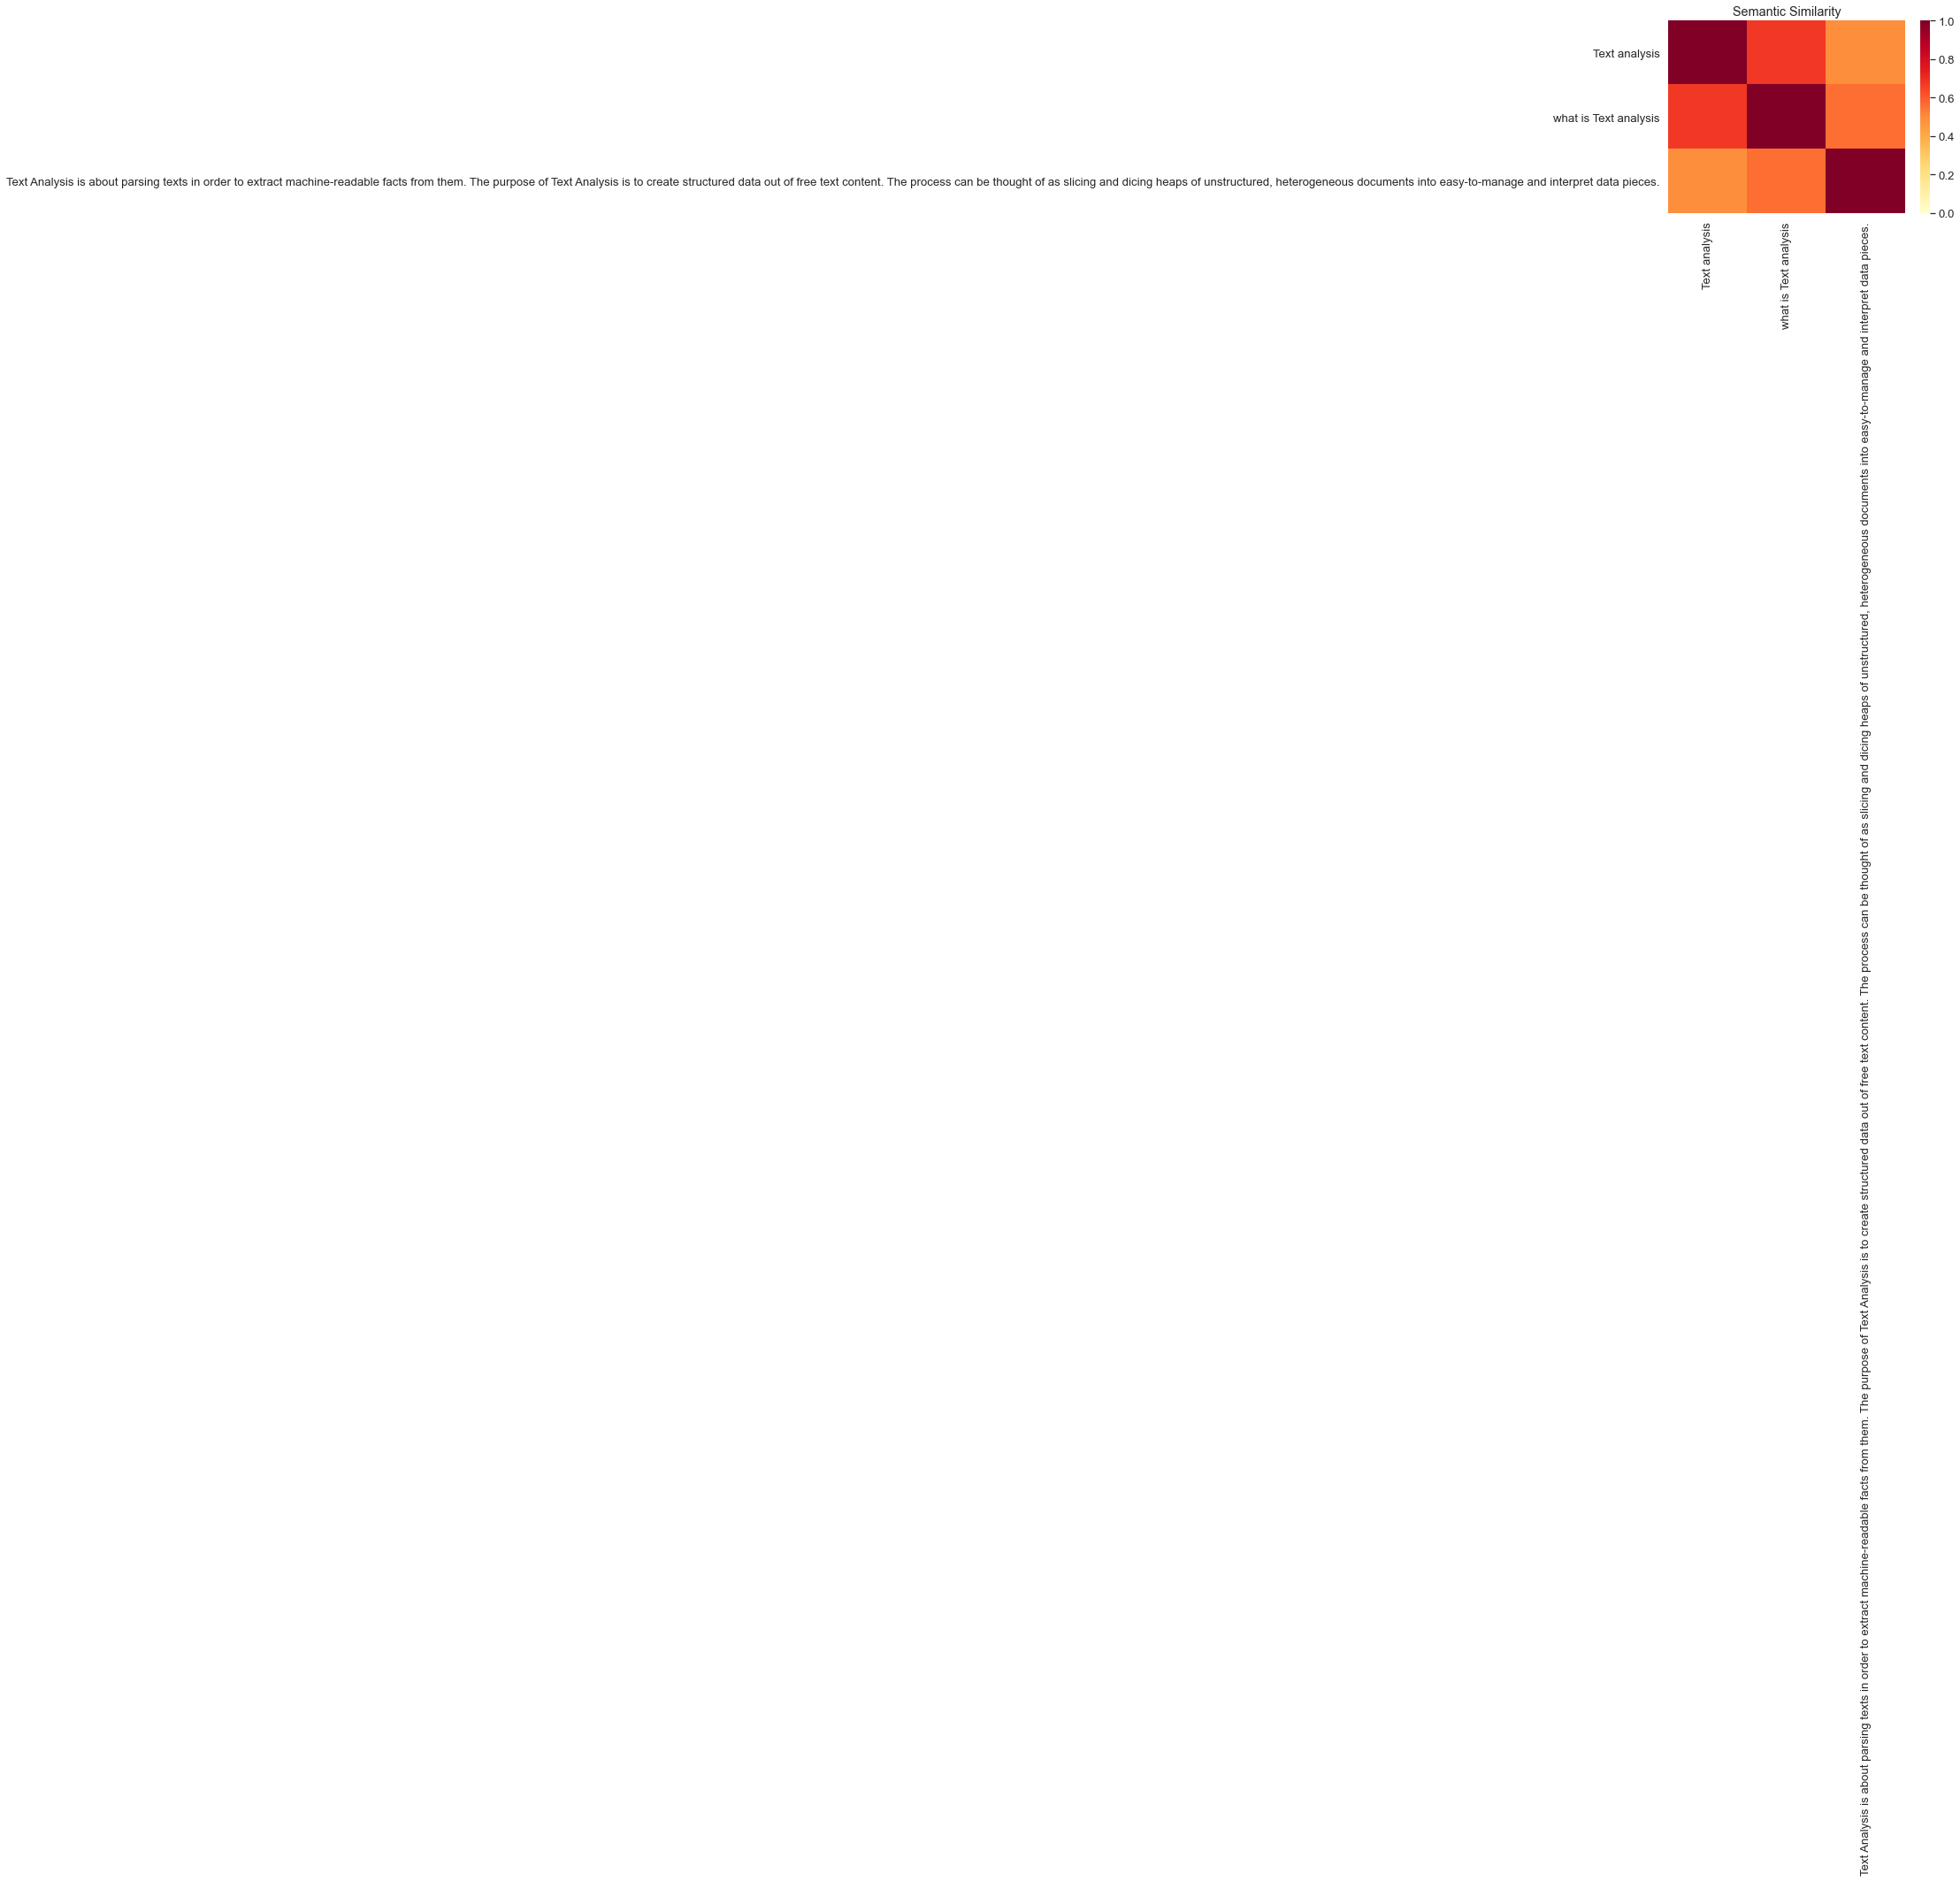

In [34]:
plot(case4Message)

Reference:
https://tfhub.dev/google/universal-sentence-encoder/4

APPLICATION:
    Next word prediction
    Paragraph Summerization or article summerization ...etc